In [1]:
import pandas as pd
import os,sys
import numpy as np
import SimpleITK as sitk
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
BC_file = "/data/medical/DeepLung/npy_type/BC_annos.csv"
bc_annos = pd.read_csv(BC_file).values
HC_file = "/data/medical/DeepLung/npy_type/HC_annos.csv"
hc_annos = pd.read_csv(HC_file).values

In [3]:
print(bc_annos.shape)
print(hc_annos.shape)

(1091, 5)
(509, 5)


In [4]:
BC_dir = "/data/medical/DeepLung/npy_type/BC/"
HC_dir = "/data/medical/DeepLung/npy_type/HC/"

bc_lst = os.listdir(BC_dir)
hc_lst = os.listdir(HC_dir)

In [5]:
BC_file = BC_dir + bc_lst[0]
print(BC_file)
HC_file = HC_dir + hc_lst[0]
print(HC_file)

/data/medical/DeepLung/ForKBS/npy_type/BC/00000076.npy
/data/medical/DeepLung/ForKBS/npy_type/HC/00000076.npy


In [6]:
BC_array = np.load(BC_file).tolist()
BC_array.keys()
BC_img = BC_array['img']
print(BC_img.shape)

(336, 512, 512)


In [7]:
BC_anno = bc_annos[bc_annos[:,0] == bc_lst[0]][:,1:]
print(BC_anno)

[[145 204 231 9.399987793]
 [169 157 211 5.8000061039999995]
 [217 212 112 6.8]
 [232 316 238 6.847489929]]


In [8]:
len(bc_lst)

360

In [9]:
BC_img

array([[[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ..., 
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024]],

       [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ..., 
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024]],

       [[-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        ..., 
        [-1024, -1024, -1024, ..., -1024, -1024, -1024],
        [-1024, -1024, -1024, ..., -1024, 

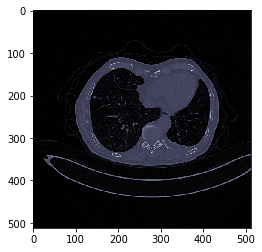

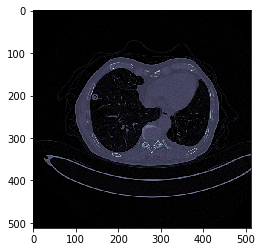

In [10]:
lung_nodule_bb = BC_anno[0,:]
zslice = BC_img.shape[0] - 1 - int(lung_nodule_bb[2])
tmp_img = np.copy(BC_img[zslice,:,:])
plt.imshow(tmp_img,cmap=plt.cm.bone)
plt.show()

# Show the CT images with annotated lung nodule
cv2.circle(tmp_img,(int(lung_nodule_bb[0]),int(lung_nodule_bb[1])),int(lung_nodule_bb[3]/2)+2,255,2)
plt.imshow(tmp_img,cmap=plt.cm.bone)
plt.show()

(42, 512, 512)
[[351 149 16 14.293087005599999]]


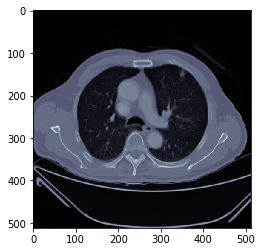

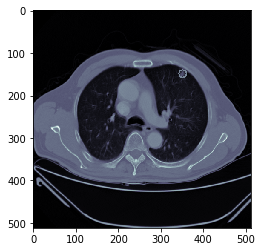

In [11]:
HC_array = np.load(HC_file).tolist()
HC_array.keys()

HC_img = HC_array['img']
print(HC_img.shape)
HC_anno = hc_annos[hc_annos[:,0] == hc_lst[0]][:,1:]
print(HC_anno)

lung_nodule_bb = HC_anno[0,:]
zslice = HC_img.shape[0] - 1 - int(lung_nodule_bb[2])
tmp_img = np.copy(HC_img[zslice,:,:])
plt.imshow(tmp_img,cmap=plt.cm.bone)
plt.show()

# Show the CT images with annotated lung nodule
cv2.circle(tmp_img,(int(lung_nodule_bb[0]),int(lung_nodule_bb[1])),int(lung_nodule_bb[3]/2)+2,255,2)
plt.imshow(tmp_img,cmap=plt.cm.bone)
plt.show()